In [1]:
from collections import namedtuple
import numpy as np

In [2]:
Microchip = namedtuple ('Microchip',['test_1','test_2','test_result'])

In [3]:
def row_parser (row):
    splitted = row.strip().split(',')
    my_microchip = Microchip ( float ( splitted[0] ), float ( splitted[1] ), int ( splitted[2] ) )
    return my_microchip

def reader ():
    microchips = []
    with open ('ex2data2.txt', 'r') as f:
        for row in f:
            microchip = row_parser (row)
            microchips.append (microchip)
    test_1 = np.array ( [student.test_1 for microchip in microchips] )
    test_2 = np.array ( [student.test_2 for microchip in microchips] )
    test_result = np.array ( [student.test_result for microchip in microchips] )
    return test_1,test_2,test_result

In [4]:
test_1,test_2,test_result =  reader ()

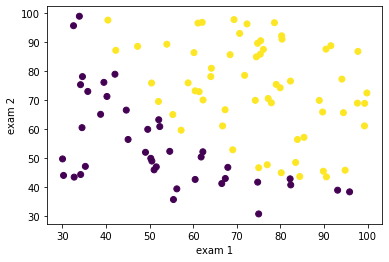

In [5]:
import matplotlib.pyplot as plt
plt.scatter (exam_1,exam_2,c= admitted_status)
plt.xlabel('exam 1')
plt.ylabel('exam 2')
plt.show()

Feature Scaling

In [6]:
X = np.array ([exam_1,exam_2])
Y = np.array (admitted_status).reshape(X.shape[1],1)

In [7]:
def X_normalize (X, add_1 = 1):
    """
    feature is a numpy array of input data Then
    Puts X in a general format 
    Adds 1 (constant column) to the features
    You can control adding constant using add_1
    """
    #Warning: We do not scale y
    mean = np.mean (X, axis=1).reshape (2,1)
    std = np.std (X, axis=1).reshape (2,1)
    X_norm = (X - mean) / std
    X_norm = X_norm.transpose()
    if add_1 == 1 :
        one = np.ones( (X_norm.shape[0],1) )
        X_norm = np.concatenate([one,X_norm],axis = 1)
    return X_norm
X_norm = X_normalize (X)

In [8]:
import math
def sigmoid (x):
    if type (x) == np.ndarray:
        return 1/(1 + np.exp(-x))
    else:
        return 1/(1+math.exp(-x))

In [9]:
import math
def cost_function (X, theta, y):
    h_theta = sigmoid ( X@theta )
    m = X.shape[0]
    cost = sum( -y*np.log10(h_theta) - (1-y)*np.log10(1-h_theta) )
    return cost

In [16]:
test = np.array ([[10,2,3],[10,20,30]])
np.log10(test)

array([[1.        , 0.30103   , 0.47712125],
       [1.        , 1.30103   , 1.47712125]])

In [10]:
theta = np.array([0,0,0]).reshape(3,1)
cost_function(X_norm,theta,Y)

array([30.10299957])

In [ ]:
Y = np.array (house_price)
Y = Y.reshape(Y.shape[0],1)

In [11]:
def gradient_descent (X, theta, Y, alpha=0.1, iterations=1500):
    costs = []
    for counter in range (iterations):
        #m is number of columns in X
        m = X.shape[0]
        #Calculating yhat for all the points in X
        h_theta = sigmoid ( X@theta )
        #Storing the difference between estimation and the labels in diff
        diff = h_theta - Y
        sums = []
        #Calculating Sigma(i=1 until m) [ (hθ(x(i)) − y(i))x( ji) ] (j=1,..,number of columns in X )
        for i in range(X[0].shape[0]):
            X_i = X[:,i].reshape((X.shape[0],1))
            sum_ = (diff.transpose() @ X_i)[0][0]
            sums.append(sum_)
        #Updating theta
        new_theta = []
        for i,sum_ in enumerate (sums):
            new_theta.append( [theta[i][0]-alpha*(1/m)*sum_])
        cost = cost_function (X, new_theta, Y)[0]
        costs.append(cost)
        theta = new_theta
    return theta,costs



In [12]:
#Choosing the appropriate learning rate
iterations = 400
initial_theta = np.array([0,0,0]).reshape(3,1)
alphas = [0.01,0.05,0.1,0.15,0.2,0.16]
costs_alpha = []
for alpha in alphas:
    theta,costs = gradient_descent (X_norm, initial_theta, Y, alpha, iterations)
    costs_alpha.append ( [alpha,costs] )

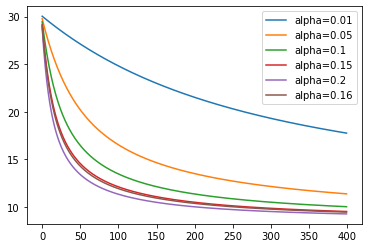

In [13]:
plt.plot(range(0,iterations), costs_alpha[0][1],label='alpha='+str(costs_alpha[0][0]))
plt.plot(range(0,iterations), costs_alpha[1][1],label='alpha='+str(costs_alpha[1][0]))
plt.plot(range(0,iterations), costs_alpha[2][1],label='alpha='+str(costs_alpha[2][0]))
plt.plot(range(0,iterations), costs_alpha[3][1],label='alpha='+str(costs_alpha[3][0]))
plt.plot(range(0,iterations), costs_alpha[4][1],label='alpha='+str(costs_alpha[4][0]))
plt.plot(range(0,iterations), costs_alpha[5][1],label='alpha='+str(costs_alpha[5][0]))
plt.legend()
plt.show()

In [14]:
alpha = 0.2
theta,costs = gradient_descent (X_norm, initial_theta, Y, alpha, iterations)

min costs is 9.287603925301106


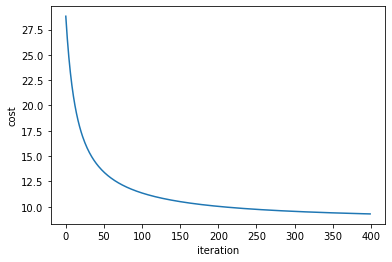

In [15]:
plt.plot ( range(0,iterations) ,costs)
plt.xlabel ('iteration')
plt.ylabel ('cost')
print (f'min costs is {min (costs)}')

In [16]:
def predict (theta,x):
    y_hat = sigmoid (x @ theta)
    return y_hat

In [17]:
def test_data_normalize (test_X, X, add_1=1):
    """
    Normalizes trial test_data according to the 
    mean and std of the training dataset
    """
    mean = np.mean (X, axis=1).reshape (2,1)
    std = np.std (X, axis=1).reshape (2,1)
    test_X_norm = (test_X - mean) / std
    test_X_norm = test_X_norm.transpose()
    if add_1 == 1 :
        one = np.ones( (test_X_norm.shape[0],1) )
        X_norm = np.concatenate([one,test_X_norm],axis = 1)
    return X_norm

In [44]:
test_X = [[90,10,50],[90,10,50]]
test_X_norm = test_data_normalize(test_X, X)
print (test_X_norm)
predict (theta,test_X_norm)

[[ 1.          1.25799907  1.28601787]
 [ 1.         -2.87408576 -3.04073044]
 [ 1.         -0.80804335 -0.87735629]]


array([[9.99726438e-01],
       [2.73140114e-07],
       [3.06264612e-02]])

In [45]:
theta

[[1.18756281091934], [2.873775867155368], [2.6445504831371633]]

In [ ]:
func = lambda x: 1 if x > 0.5 else 0
Y_test = np.array ( list (map (func,probs)) ).reshape(probs.shape[0],1)

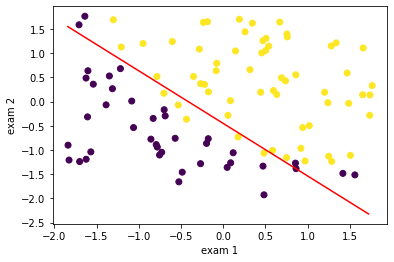

In [48]:
test_exam1 = [item for item in range (30,100)]
test_exam2 = [item for item in range (30,100)]

test_x =  np.array ([test_exam1,test_exam2])
test_x_norm = test_data_normalize(test_x, X)

test_exam1_norm = test_x_norm[:,1]
test_exam2_norm = -(theta[1][0]/theta[2][0])*test_exam1_norm - (theta[0][0]/theta[2][0])

plt.plot (test_exam1_norm,test_exam2_norm,'r')
plt.scatter (X_norm[:,1],X_norm[:,2],c=Y)
plt.xlabel('exam 1')
plt.ylabel('exam 2')
plt.show()